# Fetch coding challenge

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize


# Receipts data set

In [213]:
# read the data
receipts_df= pd.read_json('receipts.json', lines= True,  orient='columns')
receipts_df.head(5) # display the top 5 rows and all the columns

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '26.00', 'itemPrice': '26.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 5, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 5}]",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '1', 'itemPrice': '1', 'partnerItemId': '1', 'quantityPurchased': 1}, {'barcode': '028400642255', 'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ', 'finalPrice': '10.00', 'itemPrice': '10.00', 'needsFetchReview': True, 'needsFetchReviewReason': 'USER_FLAGGED', 'partnerItemId': '2', 'pointsNotAwardedReason': 'Action not allowed for user and CPG', 'pointsPayerId': '5332f5fbe4b03c9a25efd0ba', 'preventTargetGapPoints': True, 'quantityPurchased': 1, 'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE', 'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba', 'userFlaggedBarcode': '028400642255', 'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ', 'userFlaggedNewItem': True, 'userFlaggedPrice': '10.00', 'userFlaggedQuantity': 1}]",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 3}]",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '28.00', 'itemPrice': '28.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 4, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '28.00', 'userFlaggedQuantity': 4}]",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '1', 'itemPrice': '1', 'partnerItemId': '1', 'quantityPurchased': 1}, {'barcode': '1234', 'finalPrice': '2.56', 'itemPrice': '2.56', 'needsFetchReview': True, 'needsFetchReviewReason': 'USER_FLAGGED', 'partnerItemId': '2', 'preventTargetGapPoints': True, 'quantityPurchased': 3, 'userFlaggedBarcode': '1234', 'userFlaggedDescription': '', 'userFlaggedNewItem': True, 'userFlaggedPrice': '2.56', 'userFlaggedQuantity': 3}]",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [214]:
# no of rows and columns in dataset
receipts_df.shape

(1119, 15)

# Checking for duplicates data

In [236]:
# _id is the primary key
receipts_df['_id'].nunique()


1119

The no of rows in the the dataframe is 1119 and the unique '_id' is also 1119.Hence, there are no duplicates in the dataset

# Checking for missing/ null data

In [215]:
#check for nulls or missing data
print(receipts_df.isnull().sum())
#percentage of missing values for each column
for col in receipts_df.columns:
    null_percentage = receipts_df[col].isnull().sum() / len(receipts_df) * 100
    print(f"{col}: {null_percentage:.2f}% null values")

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64
_id: 0.00% null values
bonusPointsEarned: 51.39% null values
bonusPointsEarnedReason: 51.39% null values
createDate: 0.00% null values
dateScanned: 0.00% null values
finishedDate: 49.24% null values
modifyDate: 0.00% null values
pointsAwardedDate: 52.01% null values
pointsEarned: 45.58% null values
purchaseDate: 40.04% null values
purchasedItemCount: 43.25% null values
rewardsReceiptItemList: 39.32% null values
rewardsReceiptStatus: 0.00% null values
totalSpent: 38.87% null values
userId: 0.00% null values


Some of the columns have significant missing values:-



rewardsReceiptItemList: 39.32% null values and totalSpent: 38.87% null values and purchasedItemCount: 43.25% null values:- This indicates that certain reciepts did not have items purchased and hence the spent amount and purchased items count could be missing because of that . The itmes missing in receipts is of majorn concern , it could be due to human error(data entry) or software error. It further leads to missing values in other columns.


bonusPointsEarned: 51.39% null values and pointsEarned: 45.58% null values-  bonus points earned column has more than 50% of null values and points earned column has 46% of missing values. This can indicate that certain reciepts did not get or earn bonus points or have not been noted/enetered due to human errors. This is of considerable concern.

finishedDate: 49.24% null values:- The finished date column has a lot of missing values and it does not help in identifying when the recipets were processed.

The missing data can be handled by dropping the values, replacing with mean/median or data imputation to perform further analysis.

In [216]:
# cleaning and formating the data within each column
receipts_df['_id'] = receipts_df['_id'].apply(lambda x: x['$oid']if isinstance(x, dict) else x)
receipts_df['createDate'] = receipts_df['createDate'].apply(lambda x: x['$date']if isinstance(x, dict) else x)
receipts_df['dateScanned'] = receipts_df['dateScanned'].apply(lambda x: x['$date'] if isinstance(x, dict) else x)
receipts_df['finishedDate'] = receipts_df['finishedDate'].apply(lambda x: x['$date']if isinstance(x, dict) else x)
receipts_df['modifyDate'] = receipts_df['modifyDate'].apply(lambda x: x['$date'] if isinstance(x, dict) else x)
receipts_df['pointsAwardedDate'] = receipts_df['pointsAwardedDate'].apply(lambda x: x['$date']if isinstance(x, dict) else x)
receipts_df['purchaseDate'] = receipts_df['purchaseDate'].apply(lambda x: x['$date'] if isinstance(x, dict) else x)



In [217]:
receipts_df.head(5)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '26.00', 'itemPrice': '26.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 5, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 5}]",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)",1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,150.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '1', 'itemPrice': '1', 'partnerItemId': '1', 'quantityPurchased': 1}, {'barcode': '028400642255', 'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ', 'finalPrice': '10.00', 'itemPrice': '10.00', 'needsFetchReview': True, 'needsFetchReviewReason': 'USER_FLAGGED', 'partnerItemId': '2', 'pointsNotAwardedReason': 'Action not allowed for user and CPG', 'pointsPayerId': '5332f5fbe4b03c9a25efd0ba', 'preventTargetGapPoints': True, 'quantityPurchased': 1, 'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE', 'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba', 'userFlaggedBarcode': '028400642255', 'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ', 'userFlaggedNewItem': True, 'userFlaggedPrice': '10.00', 'userFlaggedQuantity': 1}]",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,1609687537000,1609687537000,NaN,1609687542000,NaN,5.0,1.609632e+12,1.0,"[{'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 3}]",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,5.0,1.609632e+12,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '28.00', 'itemPrice': '28.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 4, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '28.00', 'userFlaggedQuantity': 4}]",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,5.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '1', 'itemPrice': '1', 'partnerItemId': '1', 'quantityPurchased': 1}, {'barcode': '1234', 'finalPrice': '2.56', 'itemPrice': '2.56', 'needsFetchReview': True, 'needsFetchReviewReason': 'USER_FLAGGED', 'partnerItemId': '2', 'preventTargetGapPoints': True, 'quantityPurchased': 3, 'userFlaggedBarcode': '1234', 'userFlaggedDescription': '', 'userFlaggedNewItem': True, 'userFlaggedPrice': '2.56', 'userFlaggedQuantity': 3}]",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [218]:
receipts_df['_id'].nunique()

1119

# Data types of columns- Conversion of data types

In [219]:
#check the data types and non nulls count
# It can be observed that the date data types are objects and not datetime
print(receipts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   int64  
 4   dateScanned              1119 non-null   int64  
 5   finishedDate             568 non-null    float64
 6   modifyDate               1119 non-null   int64  
 7   pointsAwardedDate        537 non-null    float64
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    float64
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [240]:
# convert objects to datetime data types
receipts_df[['createDate', 'dateScanned', 'finishedDate', 'pointsAwardedDate', 'purchaseDate', 'modifyDate']]=receipts_df[['createDate', 'dateScanned', 'finishedDate', 'pointsAwardedDate', 'purchaseDate', 'modifyDate']].applymap(lambda x: pd.to_datetime(x, unit='ms'))


In [221]:
receipts_df.dtypes

_id                                object
bonusPointsEarned                 float64
bonusPointsEarnedReason            object
createDate                 datetime64[ns]
dateScanned                datetime64[ns]
finishedDate               datetime64[ns]
modifyDate                 datetime64[ns]
pointsAwardedDate          datetime64[ns]
pointsEarned                      float64
purchaseDate               datetime64[ns]
purchasedItemCount                float64
rewardsReceiptItemList             object
rewardsReceiptStatus               object
totalSpent                        float64
userId                             object
dtype: object

# Numerical variables/ Continous variables


In [222]:
#numerical variables in recipets dataframe
num_vars = [var for var in receipts_df.columns if receipts_df[var].dtype == 'float64']
num_vars

['bonusPointsEarned', 'pointsEarned', 'purchasedItemCount', 'totalSpent']

In [223]:
# Summary statistics of numerical variables
receipts_df.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


# Outliers detection

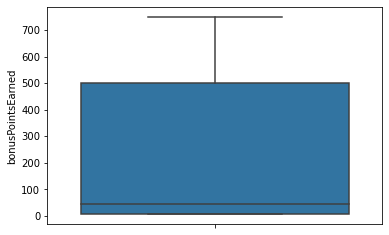

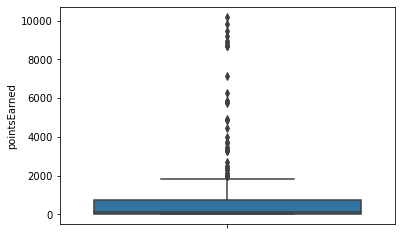

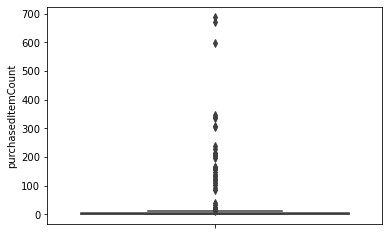

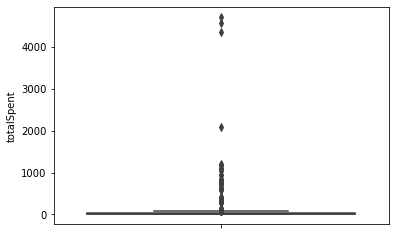

In [224]:
# outliers for numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

for column in receipts_df.columns:
    if receipts_df[column].dtype != "object" and receipts_df[column].dtype != 'datetime64[ns]' :
        sns.boxplot(y=receipts_df[column])
        plt.show()



There are many outliers in the continous variables which could lead the data to be skewed.
This indicates that necessary transformations like log, box-cox, square root transformations need to be performed.

# Categorical variables

In [225]:
#Categorical variables in recipets dataframe
cat_vars = [var for var in receipts_df.columns if receipts_df[var].dtype == 'O']
cat_vars

['_id',
 'bonusPointsEarnedReason',
 'rewardsReceiptItemList',
 'rewardsReceiptStatus',
 'userId']

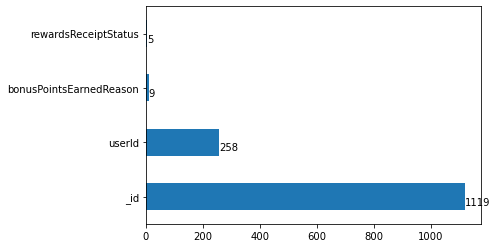

In [226]:
#Cardinality - checking the number of unique values in each categorical column

import matplotlib.pyplot as plt

# Filter categorical columns without lists
cat_vars_no_lists = [column for column in receipts_df[cat_vars].columns if not receipts_df[column].apply(lambda x: isinstance(x, list)).any()]

chart = receipts_df[cat_vars_no_lists].nunique().sort_values(ascending=False).plot.barh()

for i in chart.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(round(i.get_width(), 2)))

plt.show()


Caridnality suggests that only user ID has lot of unqiye values compared to other variables

# The data quality issues in receipts data sets are
# 1) Missing values/ null values
# 2) Outliers need to be handled
# 3) Cardinality issues- less unique values
# 4) Data type of columns needed to be handled
# 5) The data has a nested json column which needs to be exracted so that the data can be merged/joined with other tables/data.

# Users Data set

In [250]:
users_df= pd.read_json('users.json', lines=True)
users_df

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


In [251]:
# Remove dictionaries within each row
users_df['_id'] = users_df['_id'].apply(lambda x: x['$oid']if isinstance(x, dict) else x)
users_df['createdDate'] = users_df['createdDate'].apply(lambda x: x['$date']if isinstance(x, dict) else x)
users_df['lastLogin'] = users_df['lastLogin'].apply(lambda x: x['$date'] if isinstance(x, dict) else x)



In [252]:
users_df1= users_df.copy()
users_df1.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI


In [253]:
users_df1.shape

(495, 7)

# Checking for duplicates

In [254]:
users_df['_id'].nunique()

212

The unique id's are 212, Hence, The _id column has duplicates in the users table. This indicates there has been duplicate entry of users in the data. The duplicates have to be dropped. 

In [258]:
# new dataframe with duplicates dropped
users_df1.drop_duplicates()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
6,5ff1e1e8cfcf6c399c274ad9,True,1609687528354,1.609688e+12,consumer,Email,WI
7,5ff1e1b7cfcf6c399c274a5a,True,1609687479626,1.609687e+12,consumer,Email,WI
9,5ff1e1f1cfcf6c399c274b0b,True,1609687537564,1.609688e+12,consumer,Email,WI
...,...,...,...,...,...,...,...
435,5fc961c3b8cfca11a077dd33,True,1607033283936,1.614379e+12,fetch-staff,Email,NH
455,5fa41775898c7a11a6bcef3e,True,1604589429396,1.614874e+12,fetch-staff,Email,NaN
456,5fa32b4d898c7a11a6bcebce,True,1604528973309,1.614843e+12,fetch-staff,Google,AL
462,5964eb07e4b03efd0c0f267b,True,1499785991771,1.614885e+12,fetch-staff,NaN,IL


# Data types of columns- Conversion of data types

In [259]:
# the dates are object datatypes
users_df1.dtypes

_id              object
active             bool
createdDate       int64
lastLogin       float64
role             object
signUpSource     object
state            object
dtype: object

In [260]:
# convert objects to datetime data types
users_df[['createdDate', 'lastLogin']]=users_df[['createdDate', 'lastLogin']].applymap(lambda x: pd.to_datetime(x, unit='ms'))
users_df.dtypes

_id                     object
active                    bool
createdDate     datetime64[ns]
lastLogin       datetime64[ns]
role                    object
signUpSource            object
state                   object
dtype: object

# Missing data 

In [261]:
#check for nulls or missing data
print(users_df.isnull().sum())
#percentage of missing values for each column
for col in users_df.columns:
    null_percentage = users_df[col].isnull().sum() / len(users_df) * 100
    print(f"{col}: {null_percentage:.2f}% null values")

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64
_id: 0.00% null values
active: 0.00% null values
createdDate: 0.00% null values
lastLogin: 12.53% null values
role: 0.00% null values
signUpSource: 9.70% null values
state: 11.31% null values


The Last_login column and state column have null values. 
This is of a major concern as some the users last login date in the app has not been captured. 
This justifies that the state of the user being active has not been captured.
This is of a concern as it will affect in identifying the active users of the app and user footprints and user retention is affected deeply.

# The data quality issues in users 
# 1) Almost 50% of the data is redundant. 
# 2) The data types needed to be converted suitably.
# 3) Missing users activity tracking details can affect major business metrics in the data

# Brands data

In [262]:
brands_df= pd.read_json('brands.json', lines= True)
brands_df.head(20)

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'}",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, '$ref': 'Cogs'}",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, '$ref': 'Cogs'}",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, '$ref': 'Cogs'}",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, '$ref': 'Cogs'}",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
5,{'$oid': '601ac142be37ce2ead43755b'},511111719885,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, '$ref': 'Cogs'}",test brand @1612366146091,0.0,TEST BRANDCODE @1612366146091
6,{'$oid': '601ac142be37ce2ead43755c'},511111219897,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, '$ref': 'Cogs'}",test brand @1612366146133,0.0,TEST BRANDCODE @1612366146133
7,{'$oid': '5cdad0f5166eb33eb7ce0faa'},511111104810,Condiments & Sauces,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b06aca36af13c6'}}",J.L. Kraft,NaN,J.L. KRAFT
8,{'$oid': '5ab15636e4b0be0a89bb0b07'},511111504412,Canned Goods & Soups,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5a734034e4b0d58f376be874'}}",Campbell's Home Style,0.0,CAMPBELLS HOME STYLE
9,{'$oid': '5c408e8bcd244a1fdb47aee7'},511111504788,Baking,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '59ba6f1ce4b092b29c167346'}}",test,NaN,TEST


In [156]:
brands_df.shape

(1167, 8)

# Check for duplicates

In [267]:
brands_df['_id'].nunique()

1167

The no of unique brands id's are 1167 which is equal to no of ids in data. Hence no duplicates found in the data.

# Checking the datatypes

In [275]:
brands_df.dtypes

_id              object
barcode           int64
category         object
categoryCode     object
cpg              object
name             object
topBrand        float64
brandCode        object
dtype: object

In [280]:
brands_df['barcode']=brands_df['barcode'].astype('object')

In [281]:
print(brands_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   object 
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), object(7)
memory usage: 73.1+ KB
None


The barcode needs to be converted to object data tyep. Other than this,There is no issue with the default datatypes.

# Missing data

In [282]:
#check for nulls or missing data
print(brands_df.isnull().sum())
#percentage of missing values for each column
for col in brands_df.columns:
    null_percentage = brands_df[col].isnull().sum() / len(brands_df) * 100
    print(f"{col}: {null_percentage:.2f}% null values")

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64
_id: 0.00% null values
barcode: 0.00% null values
category: 13.28% null values
categoryCode: 55.70% null values
cpg: 0.00% null values
name: 0.00% null values
topBrand: 52.44% null values
brandCode: 20.05% null values


The topbrand column has more than 50% of null values. - This indicates that the boolean indicator whether the brand is top or not does not work effeecienlty. It affects in identifying the top brands for business decisions.
The category code has 55.7 % of null values which is a considerable concern in terms of missing data.
The brandcode and category and category code have missing values which could lead to difficulties in identifying the brands and category for business purpose

# Categorical variables

In [299]:
#Categorical variables in recipets dataframe
cat_vars1 = [var for var in brands_df.columns if brands_df[var].dtype == 'O']
cat_vars1

list

In [300]:
cat_vars1.remove('cpg')

# Cardinality and rare values check for categorical variables

In [303]:
#check for unqiue values
for column in brands_df[cat_vars1]:
  unique_values = brands_df[cat_vars1][column].unique()
  print(f"Unique values in {column}: {unique_values}")

Unique values in _id: ['601ac115be37ce2ead437551' '601c5460be37ce2ead43755f'
 '601ac142be37ce2ead43755d' ... '5f494c6e04db711dd8fe87e7'
 '5a021611e4b00efe02b02a57' '6026d757be37ce6369301468']
Unique values in barcode: [511111019862 511111519928 511111819905 ... 511111416173 511111400608
 511111019930]
Unique values in category: ['Baking' 'Beverages' 'Candy & Sweets' 'Condiments & Sauces'
 'Canned Goods & Soups' nan 'Magazines' 'Breakfast & Cereal'
 'Beer Wine Spirits' 'Health & Wellness' 'Beauty' 'Baby' 'Frozen'
 'Grocery' 'Snacks' 'Household' 'Personal Care' 'Dairy'
 'Cleaning & Home Improvement' 'Deli' 'Beauty & Personal Care'
 'Bread & Bakery' 'Outdoor' 'Dairy & Refrigerated']
Unique values in categoryCode: ['BAKING' 'BEVERAGES' 'CANDY_AND_SWEETS' nan 'HEALTHY_AND_WELLNESS'
 'GROCERY' 'PERSONAL_CARE' 'CLEANING_AND_HOME_IMPROVEMENT'
 'BEER_WINE_SPIRITS' 'BABY' 'BREAD_AND_BAKERY' 'OUTDOOR'
 'DAIRY_AND_REFRIGERATED' 'MAGAZINES' 'FROZEN']
Unique values in name: ['test brand @16123661010

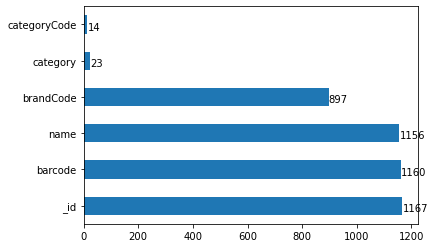

In [304]:
#Cardinality - checking the number of unique values in each categorical column

import matplotlib.pyplot as plt

# Filter categorical columns without lists
cat_vars_no_lists = [column for column in brands_df[cat_vars1].columns if not brands_df[column].apply(lambda x: isinstance(x, list)).any()]

chart = brands_df[cat_vars_no_lists].nunique().sort_values(ascending=False).plot.barh()

for i in chart.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(round(i.get_width(), 2)))

plt.show()

Most of the columns have unique values.

# Different brands in categories 

In [285]:
brands_freq = 100*(brands_df['category'].value_counts() / len(brands_df))
brands_freq

Baking                         31.619537
Beer Wine Spirits               7.712082
Snacks                          6.426735
Candy & Sweets                  6.083976
Beverages                       5.398458
Magazines                       3.770351
Health & Wellness               3.770351
Breakfast & Cereal              3.427592
Grocery                         3.341902
Dairy                           2.827763
Condiments & Sauces             2.313625
Frozen                          2.056555
Personal Care                   1.713796
Baby                            1.542416
Canned Goods & Soups            1.028278
Beauty                          0.771208
Cleaning & Home Improvement     0.514139
Deli                            0.514139
Beauty & Personal Care          0.514139
Household                       0.428449
Bread & Bakery                  0.428449
Dairy & Refrigerated            0.428449
Outdoor                         0.085690
Name: category, dtype: float64

# Data quality issue
# 1) Missing data
# 2) data type handling
# 3) More cardinality or unqiue values in columns